In [15]:
from pandas import DataFrame, read_csv, Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from bigml.api import BigML
api = BigML(project="project/5d94a42042129f2b0500005c")

In [16]:
model = api.get_ensemble("ensemble/5db162ae7811dd0557000e0e")
train_dataset=api.get_dataset("dataset/5db162947811dd7f2d008724")
val_dataset = api.get_dataset("dataset/5db162955299631c82008bd0")
evaluation = api.get_evaluation("evaluation/5db162d07811dd7f2d00872a")
evaluation['object']['result']['model']['per_class_statistics'][0]['area_under_roc_curve']

0.85905

In [21]:
df = read_csv('fulltrain_mod.csv').sample(frac=1, replace=True, random_state=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_sansna,Sum,IncomePerPerson
128037,128037,128038,0,0.204151,53,0,0.436564,4271.0,7,0,1,1,0.0,4271.0,1,4271.000000
5192,5192,5193,0,0.441020,51,1,0.512074,6666.0,16,0,2,0,2.0,6666.0,1,2222.000000
50057,50057,50058,0,0.000000,42,0,0.347464,9600.0,8,0,2,0,2.0,9600.0,0,3200.000000
109259,109259,109260,0,0.196150,40,0,0.312737,5000.0,10,0,1,0,2.0,5000.0,0,1666.666667
73349,73349,73350,0,0.144183,56,0,2362.000000,NaN,5,0,1,0,1.0,0.0,0,NaN


In [22]:
df[-int(len(df)*20/100):].to_csv("191103 learning-curves_val.csv")

In [23]:
df_train = df[:-int(len(df)*20/100)]

In [24]:
df_train[:int(len(df_train)*10/100)].to_csv("191103 learning-curves_train10.csv")
df_train[:int(len(df_train)*20/100)].to_csv("191103 learning-curves_train20.csv")
df_train[:int(len(df_train)*40/100)].to_csv("191103 learning-curves_train40.csv")
df_train[:int(len(df_train)*80/100)].to_csv("191103 learning-curves_train80.csv")
df_train.to_csv("191103 learning-curves_train.csv")

In [27]:
val_source = api.create_source('191103 learning-curves_val.csv', {"name": "191103 learning-curves_val", "source_parser": {"missing_tokens": ["NULL"]}})
train_source = api.create_source('191103 learning-curves_train.csv', {"name": "191103 learning-curves_train", "source_parser": {"missing_tokens": ["NULL"]}})
train10_source = api.create_source('191103 learning-curves_train10.csv', {"name": "191103 learning-curves_train10", "source_parser": {"missing_tokens": ["NULL"]}})
train20_source = api.create_source('191103 learning-curves_train20.csv', {"name": "191103 learning-curves_train20", "source_parser": {"missing_tokens": ["NULL"]}})
train40_source = api.create_source('191103 learning-curves_train40.csv', {"name": "191103 learning-curves_train40", "source_parser": {"missing_tokens": ["NULL"]}})
train80_source = api.create_source('191103 learning-curves_train80.csv', {"name": "191103 learning-curves_train80", "source_parser": {"missing_tokens": ["NULL"]}})

In [29]:
val_dataset = api.create_dataset(val_source, {"name": "191103 learning-curves_val"})
train_dataset = api.create_dataset(train_source, {"name": "191103 learning-curves_train"})
api.ok(val_dataset)
api.ok(train_dataset)
train10_dataset = api.create_dataset(train10_source, {"name": "191103 learning-curves_train10"})
train20_dataset = api.create_dataset(train20_source, {"name": "191103 learning-curves_train20"})
api.ok(train10_dataset)
api.ok(train20_dataset)
train40_dataset = api.create_dataset(train40_source, {"name": "191103 learning-curves_train40"})
train80_dataset = api.create_dataset(train80_source, {"name": "191103 learning-curves_train80"})
api.ok(train40_dataset)
api.ok(train80_dataset);

True

In [30]:
model = api.create_ensemble(train_dataset, {"objective_field": "SeriousDlqin2yrs"})
model10 = api.create_ensemble(train10_dataset, {"objective_field": "SeriousDlqin2yrs"})
api.ok(model)
api.ok(model10)
model20 = api.create_ensemble(train20_dataset, {"objective_field": "SeriousDlqin2yrs"})
model40 = api.create_ensemble(train40_dataset, {"objective_field": "SeriousDlqin2yrs"})
api.ok(model20)
api.ok(model40)
model80 = api.create_ensemble(train80_dataset, {"objective_field": "SeriousDlqin2yrs"})
api.ok(model80)

model = api.get_ensemble(model)
model10 = api.get_ensemble(model10)
api.ok(model)
api.ok(model10)
model20 = api.get_ensemble(model20)
model40 = api.get_ensemble(model40)
api.ok(model20)
api.ok(model40)
model80 = api.get_ensemble(model80)

In [31]:
evaluation = api.create_evaluation(model, val_dataset, {"name": "191103 learning-curves_train"})
evaluation10 = api.create_evaluation(model10, val_dataset, {"name": "191103 learning-curves_train10"})
api.ok(evaluation)
api.ok(evaluation10)
evaluation20 = api.create_evaluation(model20, val_dataset, {"name": "191103 learning-curves_train20"})
evaluation40 = api.create_evaluation(model40, val_dataset, {"name": "191103 learning-curves_train40"})
api.ok(evaluation20)
api.ok(evaluation40)
evaluation80 = api.create_evaluation(model80, val_dataset, {"name": "191103 learning-curves_train80"})
api.ok(evaluation80);

True

In [34]:
auc = evaluation['object']['result']['model']['per_class_statistics'][0]['area_under_roc_curve']
auc10 = evaluation10['object']['result']['model']['per_class_statistics'][0]['area_under_roc_curve']
auc20 = evaluation20['object']['result']['model']['per_class_statistics'][0]['area_under_roc_curve']
auc40 = evaluation40['object']['result']['model']['per_class_statistics'][0]['area_under_roc_curve']
auc80 = evaluation80['object']['result']['model']['per_class_statistics'][0]['area_under_roc_curve']

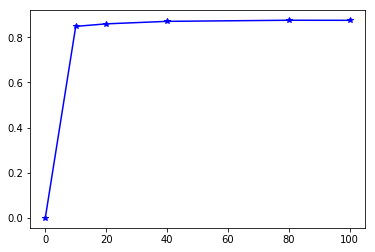

In [41]:
plt.plot([0, 10, 20, 40, 80, 100], [0, auc10, auc20, auc40, auc80, auc], 'b*-');